In [60]:
import requests
resp = requests.get('https://r0x8cf.a.searchspring.io/api/search/search.json?siteId=r0x8cf&resultsFormat=native&resultsPerPage=24&bgfilter.=undefined&page=1')

In [62]:
resp.status_code

200

In [64]:
json_data = resp.json()
json_data

{'pagination': {'totalResults': 607,
  'begin': 1,
  'end': 24,
  'currentPage': 1,
  'totalPages': 26,
  'previousPage': 0,
  'nextPage': 2,
  'perPage': 24,
  'defaultPerPage': 36},
 'sorting': {'options': [{'field': 'ss_on_sale',
    'direction': 'desc',
    'label': 'Featured'},
   {'field': 'ss_days_since_published', 'direction': 'asc', 'label': 'Newest'},
   {'field': 'mfield_yotpo_reviews_average',
    'direction': 'desc',
    'label': 'Highest Rated'},
   {'field': 'ga_unique_purchases',
    'direction': 'desc',
    'label': 'Best Selling'},
   {'field': 'title', 'direction': 'asc', 'label': 'Name: A - Z'},
   {'field': 'title', 'direction': 'desc', 'label': 'Name: Z - A'},
   {'field': 'ss_price', 'direction': 'asc', 'label': 'Price: Low to High'},
   {'field': 'ss_price', 'direction': 'desc', 'label': 'Price: High to Low'}]},
 'resultLayout': 'grid',
 'results': [{'alt_image': 'https://cdn.shopify.com/s/files/1/0080/6777/6627/files/38D555312_BLK_FL-F_600x600.jpg?v=1721708656'

In [86]:
json_data['results'][0]['tags']

['8.15',
 'Accessories',
 'active-2024-04-08',
 'activity: Backcountry',
 'activity: Freeski',
 'activity: Resort',
 'ais-O/S',
 'BackInStock',
 'category: Accessories',
 'category: All',
 'category: FA23',
 'category: Gift Guide/Accessories',
 'category: MAP',
 'category: Mens',
 'category: Mens/Accessories',
 'category: Mens/Accessories/Face Protection',
 'category: Mens/Activity',
 'category: Ski',
 'category: Ski/Backcountry',
 'category: Ski/Freeski',
 'category: Ski/Freeski/Mens',
 'category: Ski/Resort',
 'category: SPO',
 'category: Under100',
 'category: Under250',
 'category: Under50',
 'category: Under500',
 'category: Womens/Activity',
 'color-BLACK',
 'FA23',
 'FA24',
 'Final Sale',
 'gender: Mens',
 'price-0-99',
 'PromoWithExclusions',
 'SN24',
 'YGroup_pivotbalaclava']

In [85]:
for tag in json_data['results'][0]['tags']:
    if 'color' in tag:
        print(tag)

color-BLACK


In [101]:
'color-BLACK'.split('-')[1].title()

'Black'

In [98]:
#import re
#text = 'color-BLACK'
#re.findall(text,'-\+')

[]

In [108]:
import pandas as pd

base_url = 'https://spyder.com'

product_info=[]

for product in json_data['results']:
    
    for tag in product['tags']:
        if 'color' in tag:
            color = tag.split('-')[1].title()
        elif 'gender' in tag:
            gender = tag.split(': ')[1]
    
    
    product_info.append({
    'name': product['name'],
    'price':product['price'],
    'color': color,
    'gender': gender,
    'rating':product['rating'],
    'ratingCount':product['ratingCount'],
    'product_type':product['product_type'],
    'full_url': base_url + product['url'],
    'image': product['image']
    })
    
df = pd.DataFrame(product_info)

In [109]:
df

,name,price,color,gender,rating,ratingCount,product_type,full_url,image
0,Unisex Pivot - Black,35,Black,Mens,4.9,22,Mens - Balaclava,https://spyder.com/products/pivot-balaclava-black,https://cdn.shopify.com/s/files/1/0080/6777/66...
1,Mens Bandit - Black,39,Black,Mens,4.8,9,Mens - Glove,https://spyder.com/products/bandit-gloves-black,https://cdn.shopify.com/s/files/1/0080/6777/66...
2,Mens Cruise - Black,29,Black,Mens,4.8,44,Mens - Tube,https://spyder.com/products/cruise-tube-black,https://cdn.shopify.com/s/files/1/0080/6777/66...
3,Mens Bandit Full Zip - Black,129,Black,Mens,4.9,299,Mens - Fleece Jacket,https://spyder.com/products/bandit-jacket-black-2,https://cdn.shopify.com/s/files/1/0080/6777/66...
4,Mens Fuse - Black,249,Black,Mens,5,2,Mens - Insulated Pant,https://spyder.com/products/fuse-pants-black,https://cdn.shopify.com/s/files/1/0080/6777/66...
5,Mens Bandit Vest - Black,89,Black,Mens,4.9,7,Mens - Fleece Jacket,https://spyder.com/products/bandit-vest-black,https://cdn.shopify.com/s/files/1/0080/6777/66...
6,Mens Bandit Full Zip - True Navy,129,True Navy,Mens,4.9,299,Mens - Fleece Jacket,https://spyder.com/products/bandit-jacket-true...,https://cdn.shopify.com/s/files/1/0080/6777/66...
7,Mens Leader - Black,550,Black,Mens,4.9,119,Mens - Insulated Jacket,https://spyder.com/products/leader-jacket-black-1,https://cdn.shopify.com/s/files/1/0080/6777/66...
8,Mens Dare - Spyder Red,329,Spyder Red,Mens,4.8,102,Mens - Insulated Pant,https://spyder.com/products/dare-pants-lengths...,https://cdn.shopify.com/s/files/1/0080/6777/66...
9,Mens Prospect Half Zip - Black,89,Black,Mens,4.9,19,Mens - Zip T-Neck,https://spyder.com/products/prospect-1-2-zip-b...,https://cdn.shopify.com/s/files/1/0080/6777/66...


In [113]:
# put it together, multi page scrape
import requests
import pandas as pd
base_url = 'https://spyder.com'

out = pd.DataFrame()
for j in range(1,30):
    resp = requests.get(f'https://r0x8cf.a.searchspring.io/api/search/search.json?siteId=r0x8cf&resultsFormat=native&resultsPerPage=24&bgfilter.=undefined&page={j}')
    json_data = resp.json()

    product_info=[]

    for product in json_data['results']:
        for tag in product['tags']:
            if 'color' in tag:
                color = tag.split('-')[1].title()
            elif 'gender' in tag:
                gender = tag.split(': ')[1]
        
        try:
            product_type = product['product_type']
        except:
            product_type=''
    
        product_info.append({
        'name': product['name'],
        'price':product['price'],
        'color': color,
        'gender': gender,
        'rating':product['rating'],
        'ratingCount':product['ratingCount'],
        'product_type':product_type,
        'full_url': base_url + product['url'],
        'image': product['image']
        })

    df_single = pd.DataFrame(product_info)
    out = pd.concat([df_single,out])

In [114]:
out

,name,price,color,gender,rating,ratingCount,product_type,full_url,image
0,Kids Finn - Black,49,Black,Girls,4,1,Kids - Mitten,https://spyder.com/products/youth-finn-ski-mit...,https://cdn.shopify.com/s/files/1/0080/6777/66...
1,Girls Shimmer Bug Half Zip - Black,59,Black,Girls,5,2,Girls - Fleece Jacket,https://spyder.com/products/shimmer-bug-1-2-zi...,https://cdn.shopify.com/s/files/1/0080/6777/66...
2,Girls Zoey - Violet Dust,179,Violet Dust,Girls,0,0,Girls - Insulated Jacket,https://spyder.com/products/zoey-jacket-violet...,https://cdn.shopify.com/s/files/1/0080/6777/66...
3,Boys Reversible Bug - Spyder Red,25,Spyder Red,Boys,5,22,Boys - Beanie,https://spyder.com/products/reversible-bug-spy...,https://cdn.shopify.com/s/files/1/0080/6777/66...
4,Little Boys Expedition - Polar,55.6,Polar,Boys,5,19,Little Boys - Insulated Pant,https://spyder.com/products/expedition-pants-p...,https://cdn.shopify.com/s/files/1/0080/6777/66...
...,...,...,...,...,...,...,...,...,...
19,Mens Pinnacle - Black,1200,Black,Mens,4.8,52,Mens - Insulated Jacket,https://spyder.com/products/pinnacle-jacket-bl...,https://cdn.shopify.com/s/files/1/0080/6777/66...
20,Mens Primer - Black,349,Black,Mens,4.8,9,Mens - Insulated Jacket,https://spyder.com/products/primer-jacket-black-1,https://cdn.shopify.com/s/files/1/0080/6777/66...
21,Mens Epiphany - Black,650,Black,Mens,4.7,7,Mens - Insulated Jacket,https://spyder.com/products/epiphany-jacket-black,https://cdn.shopify.com/s/files/1/0080/6777/66...
22,Mens Leader - Vanilla Latte,550,Vanilla Latte,Mens,4.9,119,Mens - Insulated Jacket,https://spyder.com/products/leader-jacket-vani...,https://cdn.shopify.com/s/files/1/0080/6777/66...


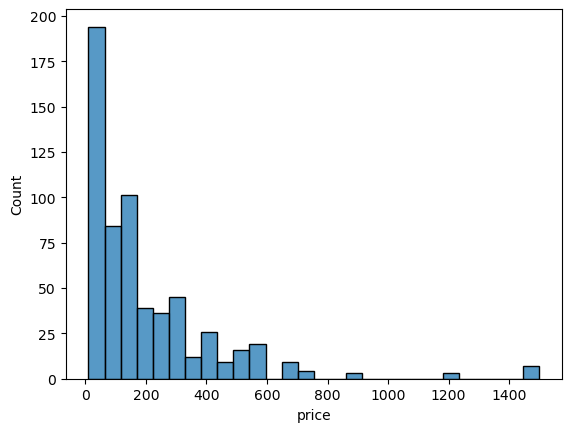

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(out.price.astype('float'))
plt.show()

In [118]:
out.price.astype('float').describe()

count     607.000000
mean      201.782718
std       232.419462
min         9.990000
25%        51.600000
50%       129.000000
75%       279.000000
max      1500.000000
Name: price, dtype: float64